In [48]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'http://apis.data.go.kr/1360000/MidFcstInfoService/getMidTa'
params ={
    'serviceKey' : 'T/+Z6GzznTN0SpyMmW2U/u1X/xvu55Vwh9W1HXdfoGXCh8xSaBrLtJzmN7SEKRV43g5u20KxytQdqjJC8pc07Q==',
    'pageNo' : '1',
    'numOfRows' : '10', 
    'dataType' : 'JSON', 
    'regId' : '11G00201', 
    'tmFc' : '202309200600' 
}

response = requests.get(url, params=params)
response.encoding = "UTF-8"

responseDict = eval(response.content)
data = responseDict['response']['body']['items']['item']

dataNp = np.array(data)
dataPd = pd.Series(dataNp)
responseData = dataPd.values

keys = []
values = []

dataPandas = pd.Series(responseData[0])

for i in dataPandas.values:
     values.append(i)
for i in dataPandas.keys():
    keys.append(i)

newKeys = []
newValues = []
for i in range(len(values)):
    if keys[i][:5] == 'taMin' or keys[i][:5] == 'taMax':
        if keys[i][:6] == keys[i]:
            newKeys.append(keys[i])
            newValues.append(values[i])
        elif keys[i][:7] == keys[i]:
            newKeys.append(keys[i])
            newValues.append(values[i])

figure = plt.figure()
axes = figure.add_subplot(111)
axes.pie(newValues, labels=newKeys)
plt.show()

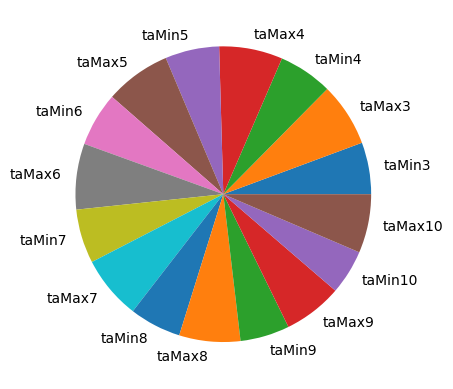